In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict
import glob
from itertools import permutations
import torchvision.transforms as transforms
import os

def concat(a,b,c):
    return np.concatenate([a,b,c],axis=1)

def save_img(img, name):
    img = np.uint8(img*255)
    pil_image= Image.fromarray(img)
    transformation = transforms.Resize((256,256))
    pil_image= transformation(pil_image)
    pil_image.save(f'{name}.png')
    
def load_imgs(img1, img2, img3):
    a = np.float32(np.load(f'data/{img1}'))
    b = np.float32(np.load(f'data/{img2}'))
    c = np.float32(np.load(f'data/{img3}'))
    a, b, c = normalize(a,b,c)
    return concat(a,b,c)

def normalize(*imgs):
    imgs_norm = []
    for img in imgs:
        img = (img-np.min(img))/(np.max(img)-np.min(img))
        imgs_norm.append(img)
    return imgs_norm

def save_all_images():
    for i in range(1,51):
        imgs = glob.glob(f'data/*_{i}.npy')
        imgs = [img[len('data/'):] for img in imgs]
        hh = sorted([img for img in imgs if img[5:7] == 'hh'], key=lambda x: int(x.split('_')[1]))
        vv = sorted([img for img in imgs if img[5:7] == 'vv'], key=lambda x: int(x.split('_')[1]))
        
        for img1, img2, img3 in permutations(hh, 3):
            first, second, third = img1.split('_')[0], img2.split('_')[0], img3.split('_')[0]
            img = load_imgs(img1, img2, img3)
            np.save(f'concat_data/{first}_{second}_{third}_{2*i}', img)
            save_img(img, f'images/{first}_{second}_{third}_{2*i}')

        for img1, img2, img3 in permutations(vv, 3):
            first, second, third = img1.split('_')[0], img2.split('_')[0], img3.split('_')[0]
            img = load_imgs(img1, img2, img3)
            np.save(f'concat_data/{first}_{second}_{third}_{2*i-1}', img)
            save_img(img, f'images/{first}_{second}_{third}_{2*i-1}')

In [4]:
save_all_images()

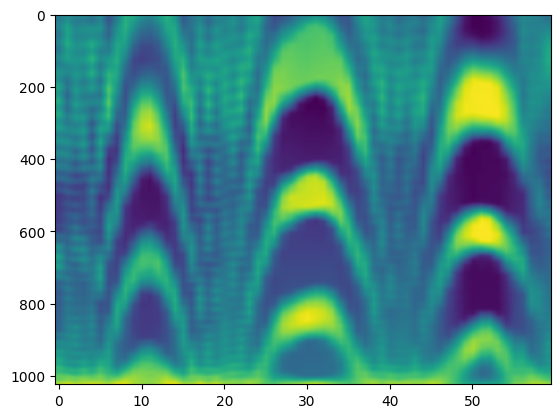

In [9]:
id = 15
img = Image.open(f"/lustre/home/lmucko/diffusion/images/AR_AS_GS_{2*id}.png")
og = np.load(f"concat_data/AR_AS_GS_{2*id}.npy")
plt.imshow(img.resize((60,1024)), aspect='auto', interpolation="bilinear")

In [25]:
with open("images/metadata.jsonl", "w") as metadata:
    for image in os.listdir("images/"):
        file_name = image
        text = " ".join(file_name.split(".")[0].split("_")[:-1]).lower()
        metadata.write(f"{{\"file_name\": \"{file_name}\", \"text\": \"{text}\"}}\n")